In [4]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hys
import tifffile
import tkinter.filedialog as tkf

In [2]:
spec_adr = tkf.askopenfilename()
print(spec_adr)

E:/data_temporary/20210713 zlp/mono_ref1.dm3


In [7]:
zlp_adr = tkf.askopenfilename()
print(zlp_adr)

E:/data_temporary/20210713 zlp/mono_ref2.dm3


In [9]:
spectrum = hys.load(spec_adr, signal_type="EELS")
ref_zlp = hys.load(zlp_adr, signal_type="EELS")

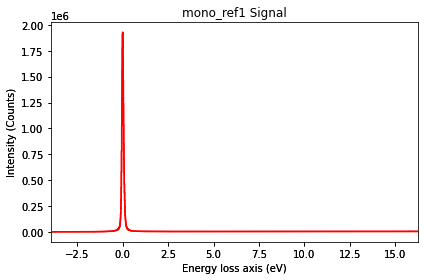

In [10]:
spectrum.plot()

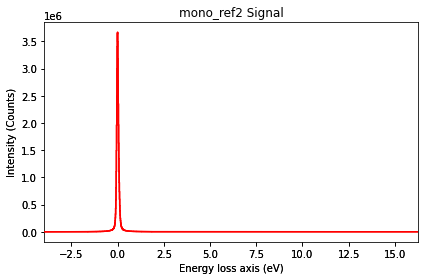

In [11]:
ref_zlp.plot()

In [14]:
ref_zlp.axes_manager

Signal axis name,size,offset,scale,units
Energy loss,2021,-3.969469515767628,0.009999999776482582,eV


In [19]:
scale = ref_zlp.axes_manager[0].scale
offset = ref_zlp.axes_manager[0].offset + scale
n_channel = ref_zlp.axes_manager[0].size
print(scale, offset, n_channel)
e_range = np.arange(offset, n_channel*scale+offset, scale)
print(e_range[0], e_range[-1])
print(e_range.shape)

0.009999999776482582 -3.9594695159911453 2021
-3.9594695159911453 16.24053003250367
(2021,)


In [22]:
v_range = 1 / e_range
print(v_range.shape)

(2021,)


In [24]:
FT_j = np.fft.fft(spectrum.data/np.max(spectrum.data))
FT_Ir = np.fft.fft(ref_zlp.data/np.max(ref_zlp.data))

In [26]:
FWHM = 0.12

In [64]:
FT_g = []
FT_k = []
for i in range(n_channel):
    g = np.exp(-np.pi**2*(FWHM/1.665)**2*k_range[i]**2)
    tmp = g*FT_j[i]/FT_Ir[i]
    FT_g.append(g)
    FT_k.append(tmp)

In [65]:
SSD = np.fft.ifft(FT_k)

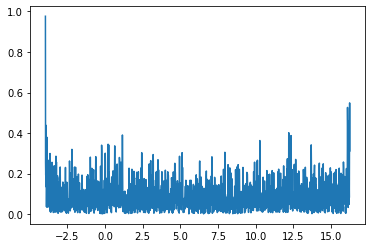

In [66]:
plt.plot(e_range, np.abs(SSD))